# Modelo Previsão Tempo Total

In [1]:
#pip install pyodbc
# importar bibliotecas
import pandas as pd
import numpy as np
import io

In [2]:
# Tratamento da base: agrupando a serie por ano e mês
df_0   = pd.read_excel(r'C:\Users\alesa\OneDrive - ANVISA - Agencia Nacional de Vigilancia Sanitaria\000_ECD\TCC\Dados\df.xlsx',
                         header=0, sheet_name="Planilha1")

df_0['DATA_FINALIZACAO'] = df_0['DT_FINALIZACAO'].dt.date
df_0['DATA_FINALIZACAO_AM'] = df_0['DT_FINALIZACAO'].dt.strftime('%Y-%m')

df_41 = pd.DataFrame(df_0[(df_0['CO_ASSUNTO'] == 5041)]) 
df_65 = pd.DataFrame(df_0[(df_0['CO_ASSUNTO'] == 5065)]) 

#df = df_0.groupby(['CO_ASSUNTO','CO_ASSUNTO_T','DATA_FINALIZACAO'])['TOTAL'].mean().reset_index()
df =    df_0.groupby(['CO_ASSUNTO','CO_ASSUNTO_T','DATA_FINALIZACAO_AM'])['TOTAL'].mean().reset_index()
df41 = df_41.groupby(['CO_ASSUNTO','CO_ASSUNTO_T','DATA_FINALIZACAO_AM'])['TOTAL'].mean().reset_index()
df65 = df_65.groupby(['CO_ASSUNTO','CO_ASSUNTO_T','DATA_FINALIZACAO_AM'])['TOTAL'].mean().reset_index()

#df65.head()


## Séries Temporais 

In [3]:
# Verificando a estacionaridade da série

from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plt


In [4]:
#result = adfuller(df['TOTAL'])
result41 = adfuller(df41['TOTAL'])
result65 = adfuller(df65['TOTAL'])

# Extraia os resultados do teste
#p_value = result[1]
p_value41 = result41[1]
p_value65 = result65[1]


# Imprima os resultados
#print(f"Valor p: {p_value}")
print(f"Valor p41: {p_value41}")
print(f"Valor p65: {p_value65}")


Valor p41: 0.011022706431745681
Valor p65: 0.0002491862947946675


In [5]:
# Verificar a estacionariedade com valor-p
#if p_value < 0.05:
#    print("A série é estacionária.")
#else:
#    print("A série não é estacionária.")
    
if p_value41 < 0.05:
    print("A série41 é estacionária.")
else:
    print("A série41 não é estacionária.")
    
if p_value65 < 0.05:
    print("A série65 é estacionária.")
else:
    print("A série65 não é estacionária.")

A série41 é estacionária.
A série65 é estacionária.


In [6]:
#### Gráficos ACF e PACF
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

In [7]:
# Definir a coluna ano como índice
df41.set_index('DATA_FINALIZACAO_AM',inplace=True)
# Alterar o nome do índice de Any para ano
# Alterar o nome do índice de Any para ano
df41.index.name = 'AnoMes'
df41 = df41[['TOTAL']]

In [8]:
# Definir a coluna ano como índice
df65.set_index('DATA_FINALIZACAO_AM',inplace=True)
# Alterar o nome do índice de Any para ano
# Alterar o nome do índice de Any para ano
df65.index.name = 'AnoMes'
df65 = df65[['TOTAL']]
#df65.head()

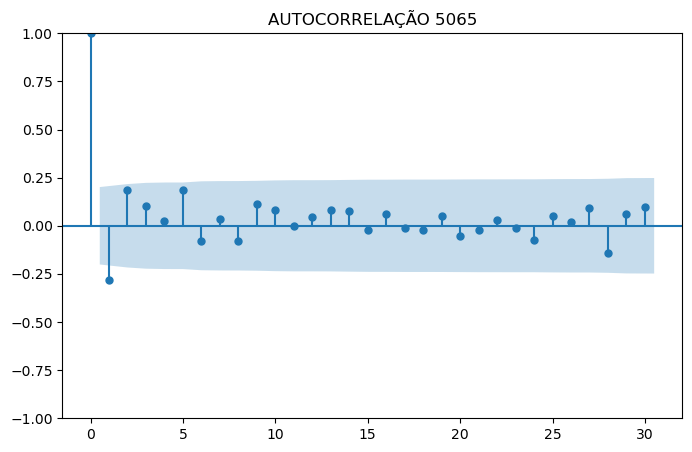

In [11]:
# Verificando Autocorrelação 
fig, ax = plt.subplots(figsize=(8,5))
plot_acf(df65['TOTAL'], lags=30, ax=ax)
plt.title('AUTOCORRELAÇÃO 5065')
plt.show()


C:\Users\alesa\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


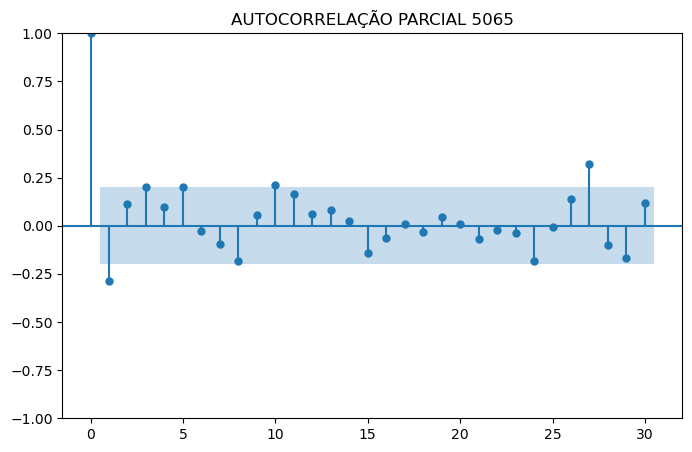

In [12]:
# Verificando Autocorrelação Parcial
fig, ax = plt.subplots(figsize=(8,5))
plot_pacf(df65['TOTAL'], lags=30, ax=ax)
plt.title('AUTOCORRELAÇÃO PARCIAL 5065')
plt.show()

## Modelo Autoregressivo (AR)

In [21]:
# AUTOREGRESSIVO
import pandas as pd
from statsmodels.tsa.ar_model import AutoReg

In [24]:
ar_modelo = AutoReg(df65[['TOTAL']], lags=2).fit()
ar_modelo.summary()

C:\Users\alesa\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            AutoReg Model Results                             
==============================================================================
Dep. Variable:                  TOTAL   No. Observations:                   95
Model:                     AutoReg(2)   Log Likelihood                -707.932
Method:               Conditional MLE   S.D. of innovations            489.424
Date:                Wed, 19 Jul 2023   AIC                           1423.863
Time:                        23:03:11   BIC                           1433.994
Sample:                             2   HQIC                          1427.954
                                   95                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       2184.5804    306.259      7.133      0.000    1584.324    2784.837
TOTAL.L1      -0.2245      0.096     -2.333      0.020      -0.413      -0.036
TOTAL.L2       0.1207      0.096      1.258      0.208      -0.067       0.309
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -2.0951           +0.0000j            2.0951            0.5000
AR.2            3.9548           +0.0000j            3.9548            0.0000
-----------------------------------------------------------------------------
"""

In [25]:
# Previsão do Modelo
pred = ar_modelo.predict(start=len(df65), end=len(df65)+2, dynamic=False)
pred

C:\Users\alesa\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\alesa\anaconda3\lib\site-packages\statsmodels\tsa\deterministic.py:302: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Index with a unit increment support extending. The index is set will contain the position relative to the data length.
  fcast_index = self._extend_index(index, steps, forecast_index)


95    1941.616409
96    2010.627914
97    1967.627973
dtype: float64

C:\Users\alesa\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\alesa\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\alesa\anaconda3\lib\site-packages\statsmodels\tsa\deterministic.py:302: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Index with a unit increment support extending. The index is set will contain the position relative to the data length.
  fcast_index = self._extend_index(index, steps, forecast_index)


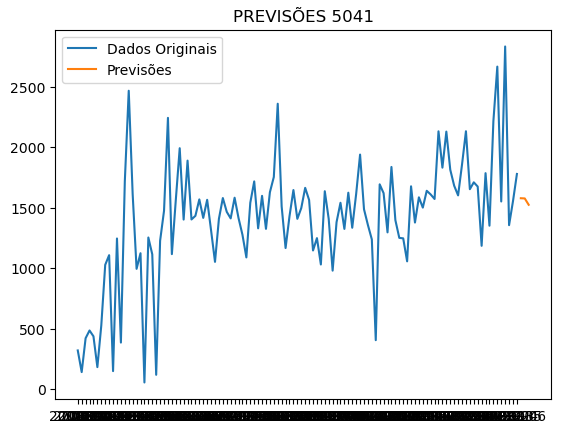

In [26]:
# Gráfico de previsão

# Ajustar o modelo ARIMA aos dados
#model = ARIMA(df41['TOTAL'], order=order)
#model_fit = model.fit()

ar_modelo = AutoReg(df41[['TOTAL']], lags=2).fit()
#modelo_ma = sm.tsa.arima.ARIMA(df65[['TOTAL']], order=(0,0,1)) # Ordem do modelo MA (p, d, q)

# Fazer previsões
n_steps = 3  # Número de passos futuros a serem previstos
forecast = ar_modelo.forecast(steps=n_steps)
#forecast1 = modelo_ma.forecast(steps=n_steps)

# Plotar os dados originais e as previsões
plt.plot(df41['TOTAL'], label='Dados Originais')
#plt.plot(np.arange(len(df65['TOTAL']), len(df65['TOTAL']) + n_steps), forecast, forecast1, label='Previsões')
plt.plot(np.arange(len(df41['TOTAL']), len(df41['TOTAL']) + n_steps), forecast, label='Previsões')
plt.title('PREVISÕES 5041')
plt.legend()
plt.show()

## Modelo de Médias Moveis (MA)

In [18]:
import statsmodels.api as sm

In [19]:
#MODELO MA
modelo_ma = sm.tsa.arima.ARIMA(df65[['TOTAL']], order=(0,0,1)) # Ordem do modelo MA (p, d, q)
resultado_ma = modelo_ma.fit()
print(resultado_ma.summary())

                               SARIMAX Results                                
Dep. Variable:                  TOTAL   No. Observations:                   95
Model:                 ARIMA(0, 0, 1)   Log Likelihood                -730.769
Date:                Wed, 19 Jul 2023   AIC                           1467.537
Time:                        22:59:48   BIC                           1475.199
Sample:                             0   HQIC                          1470.633
                                 - 95                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       1964.8678     52.218     37.628      0.000    1862.523    2067.213
ma.L1         -0.2044      0.091     -2.249      0.025      -0.383      -0.026
sigma2       2.81e+05   2.99e+04      9.407      0.0

C:\Users\alesa\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\alesa\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\alesa\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


## Modelo de Média Movel Autoregressivo (ARMA)

In [90]:
#MODELO ARMA
modelo_ma = sm.tsa.arima.ARIMA(df65[['TOTAL']], order=(0,1,1)) # Ordem do modelo MA (p, d, q)

resultado_ma = modelo_ma.fit()
print(resultado_ma.summary())

                               SARIMAX Results                                
Dep. Variable:                  TOTAL   No. Observations:                   95
Model:                 ARIMA(0, 1, 1)   Log Likelihood                -727.027
Date:                Sat, 15 Jul 2023   AIC                           1458.054
Time:                        00:09:57   BIC                           1463.140
Sample:                             0   HQIC                          1460.108
                                 - 95                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.9506      0.059    -16.043      0.000      -1.067      -0.834
sigma2      2.988e+05   2.47e+04     12.122      0.000     2.5e+05    3.47e+05
Ljung-Box (L1) (Q):                  10.45   Jarque-

C:\Users\alesa\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\alesa\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\alesa\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
